In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report,roc_curve,auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Multiply, Reshape, Activation, Concatenate, Conv2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# tf.keras.initializers.GlorotNormal


In [3]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from tabulate import tabulate
import itertools


In [6]:
import os
os.environ['KAGGLE_USERNAME'] = 'rohit123gupta'
os.environ['KAGGLE_KEY'] = '644efb84a6252c98355687aed8592869'

In [7]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

# target_path = "/content/D:th_semester\Minor Project"
target_path = "/content/sixth_semester/Minor_Project"
os.makedirs(target_path, exist_ok=True)
# api.dataset_download_files('mehradaria/covid19-lung-ct-scans', path=target_path, unzip=True)
api.dataset_download_files('plameneduardo/sarscov2-ctscan-dataset', path=target_path, unzip=True)


Dataset URL: https://www.kaggle.com/datasets/plameneduardo/sarscov2-ctscan-dataset


In [ ]:
base_dir = '/content/sixth_semester/Minor_Project/'
covid_dir = os.path.join(base_dir, 'COVID')
non_covid_dir = os.path.join(base_dir, 'non-COVID')


In [9]:
# Verify if the directories exist after downloading the dataset
print("Checking if directories exist...")
print(f"COVID directory exists: {os.path.exists(covid_dir)}")
print(f"Non-COVID directory exists: {os.path.exists(non_covid_dir)}")

# Only proceed if directories exist
if os.path.exists(covid_dir) and os.path.exists(non_covid_dir):
    print("Dataset Structure:")
    # print(f"COVID-19 images: {len(os.listdir(covid_dir))}")
    # print(f"Non-COVID-19 images: {len(os.listdir(non_covid_dir))}")
    print(f"COVID-19 images: {len(os.listdir(covid_dir))}")
    print(f"Non-COVID-19 images: {len(os.listdir(non_covid_dir))}")
else:
    print("Error: COVID or Non-COVID directory not found. Please check the download process.")


Checking if directories exist...
COVID directory exists: True
Non-COVID directory exists: True
Dataset Structure:
COVID-19 images: 1252
Non-COVID-19 images: 1229


In [ ]:
print("Dataset Structure:")
print(f"COVID-19 images: {len(os.listdir(covid_dir))}")
print(f"Non-COVID-19 images: {len(os.listdir(non_covid_dir))}")


Dataset Structure:
COVID-19 images: 1252
Non-COVID-19 images: 1229


supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r',

COVID-19 Images:


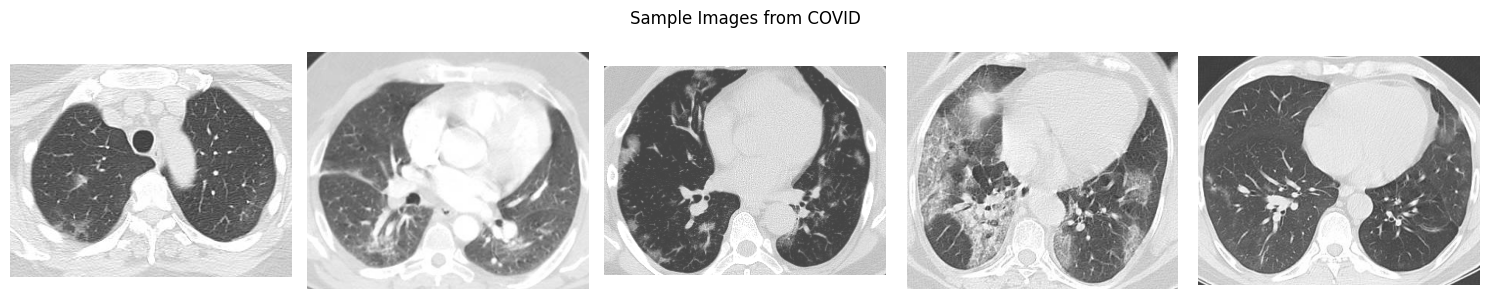


Non-COVID-19 Images:


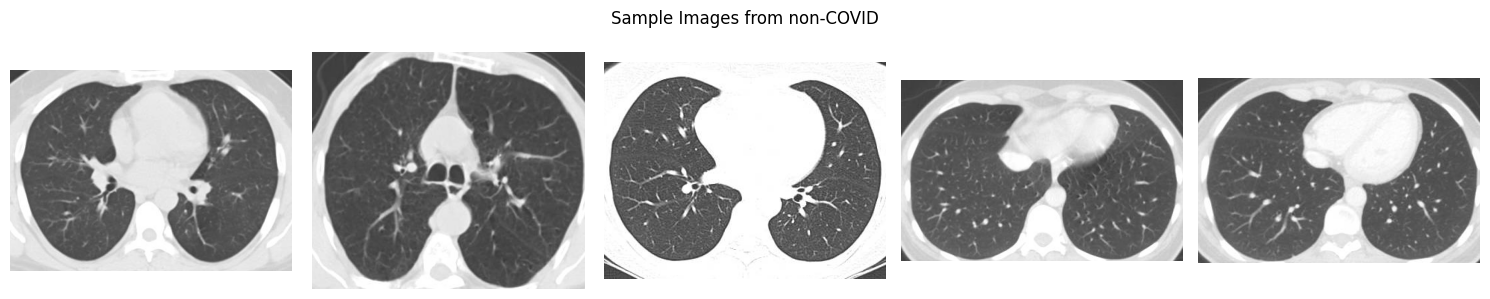


Dataset Statistics:
Number of COVID-19 images: 1252
Number of Non-COVID-19 images: 1229


In [11]:

def show_random_images(folder_path, num_images=5):
    # Geting all image files from the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    selected_files = random.sample(image_files, min(num_images, len(image_files)))

    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    fig.suptitle(f'Sample Images from {os.path.basename(folder_path)}')

    for idx, file in enumerate(selected_files):
        img_path = os.path.join(folder_path, file)
        img = Image.open(img_path)
        axes[idx].imshow(img, cmap='gray')  # 'gray' colormap for CT scans
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

print("COVID-19 Images:")
show_random_images(covid_dir)

print("\nNon-COVID-19 Images:")
show_random_images(non_covid_dir)

print("\nDataset Statistics:")
print(f"Number of COVID-19 images: {len(os.listdir(covid_dir))}")
print(f"Number of Non-COVID-19 images: {len(os.listdir(non_covid_dir))}")

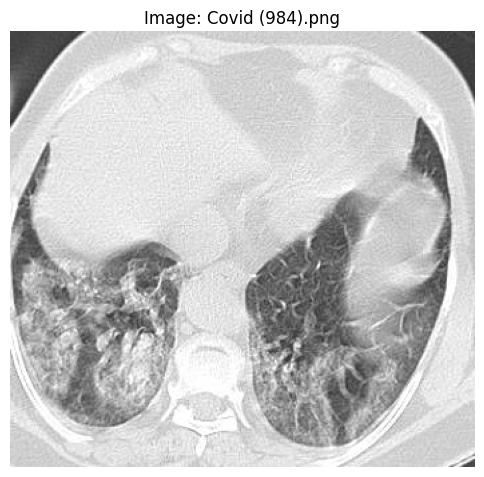

In [12]:
def show_COVID_image(image_path):
    img = Image.open(image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'Image: {os.path.basename(image_path)}')
    plt.show()

first_covid_image = os.path.join(covid_dir, os.listdir(covid_dir)[0])
show_COVID_image(first_covid_image)

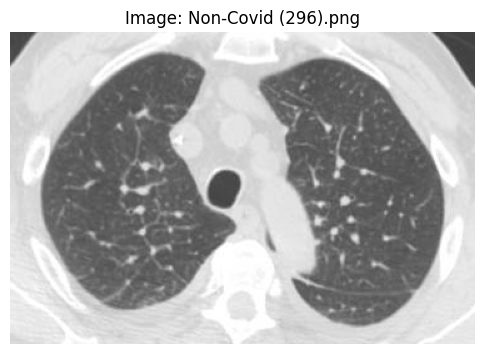

In [13]:
def show_Non_COVID_image(image_path):
    img = Image.open(image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'Image: {os.path.basename(image_path)}')
    plt.show()

first_non_covid_image = os.path.join(non_covid_dir, os.listdir(non_covid_dir)[0])
show_Non_COVID_image(first_non_covid_image)

In [15]:
print("Original Directory Structure:")
print(f"Base directory: {base_dir}")
print("\nContents of base directory:", os.listdir(base_dir))



Original Directory Structure:
Base directory: /content/sixth_semester/Minor_Project/

Contents of base directory: ['COVID', 'non-COVID']


In [ ]:
# """ split the data in train, validation and test set"""
def split_data(source_dir, train_dir, val_dir, test_dir, split_ratio=(0.7, 0.15, 0.15)):
  #create directories
  for dir_path in [train_dir, val_dir, test_dir]:
    if os.path.exists(dir_path):
      shutil.rmtree(dir_path)

    os.makedirs(os.path.join(dir_path, 'COVID'))
    os.makedirs(os.path.join(dir_path, 'non-COVID'))

  for class_name in ['COVID', 'non-COVID']:
    files = os.listdir(os.path.join(source_dir, class_name))
    random.shuffle(files)

    #calcalte split indices
    n_files = len(files)
    train_end = int(n_files * split_ratio[0])
    val_end = train_end + int(n_files * split_ratio[1])

    #Split files
    train_files = files[:train_end]
    val_files = files[train_end : val_end]
    test_files = files[val_end:]

    print(f"\nProcessing {class_name}:")
    print(f"Total files: {n_files}")
    print(f"Training files: {len(train_files)}")
    print(f"Validation files: {len(val_files)}")
    print(f"Test files: {len(test_files)}")

    #copy files to respective directories
    for file_list, dest_dir in [(train_files, train_dir),(val_files, val_dir),(test_files, test_dir)]:
      for f in file_list:
        src = os.path.join(source_dir, class_name,f)
        dst = os.path.join(dest_dir, class_name, f)
        shutil.copy2(src,dst)


In [ ]:
base_dir = '/content/sixth_semester/Minor_Project/'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [18]:
split_data(base_dir, train_dir, val_dir, test_dir)


Processing COVID:
Total files: 1252
Training files: 876
Validation files: 187
Test files: 189

Processing non-COVID:
Total files: 1229
Training files: 860
Validation files: 184
Test files: 185


In [19]:
print("\nFinal Dataset Statistics:")
for split_dir, name in [(train_dir, "Training"), (val_dir, "Validation"), (test_dir, "Test")]:
    print(f"\n{name} set:")
    # for class_name in ['COVID-19', 'Non-COVID-19']:
    for class_name in ['COVID', 'non-COVID']:
        path = os.path.join(split_dir, class_name)
        count = len(os.listdir(path)) if os.path.exists(path) else 0
        print(f"{class_name}: {count} images")


Final Dataset Statistics:

Training set:
COVID: 876 images
non-COVID: 860 images

Validation set:
COVID: 187 images
non-COVID: 184 images

Test set:
COVID: 189 images
non-COVID: 185 images


In [20]:
IMG_SIZE = 224
BATCH_SIZE = 32


Creating data generator

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Increased rotation
    width_shift_range=0.3,  # Increased shifts
    height_shift_range=0.3,
    zoom_range=0.3,  # Increased zoom
    shear_range=0.2,  # Add shearing
    horizontal_flip=True,
    vertical_flip=True,  #vertical flipping
    brightness_range=[0.8, 1.2],  # Adjust brightness
    fill_mode='nearest'
)


In [23]:
#Generator for validation and test data
valid_test_datagen = ImageDataGenerator(rescale = 1./255)

Creating Generator

In [24]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'binary',  #Binary Classification
    subset = 'training',
    shuffle = True,
    color_mode = 'grayscale'
)

Found 1736 images belonging to 2 classes.


In [25]:
validation_generator = valid_test_datagen.flow_from_directory(
    val_dir,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'binary',  #Binary Classification
    shuffle = False,
    color_mode = 'grayscale'
)

Found 371 images belonging to 2 classes.


In [26]:
test_generator = valid_test_datagen.flow_from_directory(
    test_dir,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'binary',  #Binary Classification
    shuffle = False,
    color_mode = 'grayscale'
)

Found 374 images belonging to 2 classes.


In [ ]:
# Print dataset statistics
print("\nDataset Split Statistics:")

print(f"Training samples: {len(os.listdir(os.path.join(train_dir, 'COVID'))) + len(os.listdir(os.path.join(train_dir, 'non-COVID')))}")
print(f"Validation samples: {len(os.listdir(os.path.join(val_dir, 'COVID'))) + len(os.listdir(os.path.join(val_dir, 'non-COVID')))}")
print(f"Test samples: {len(os.listdir(os.path.join(test_dir, 'COVID'))) + len(os.listdir(os.path.join(test_dir, 'non-COVID')))}")




Dataset Split Statistics:
Training samples: 1736
Validation samples: 371
Test samples: 374


In [ ]:
#  Print class distribution for each split
def print_class_distribution(directory):
    covid_count = len(os.listdir(os.path.join(directory, 'COVID')))
    non_covid_count = len(os.listdir(os.path.join(directory, 'non-COVID')))
    print(f"COVID: {covid_count}")
    print(f"non-COVID: {non_covid_count}")

print("\nClass Distribution:")
print("Training set:")
print_class_distribution(train_dir)
print("\nValidation set:")
print_class_distribution(val_dir)
print("\nTest set:")
print_class_distribution(test_dir)


Class Distribution:
Training set:
COVID: 876
non-COVID: 860

Validation set:
COVID: 187
non-COVID: 184

Test set:
COVID: 189
non-COVID: 185


Training Set Samples:


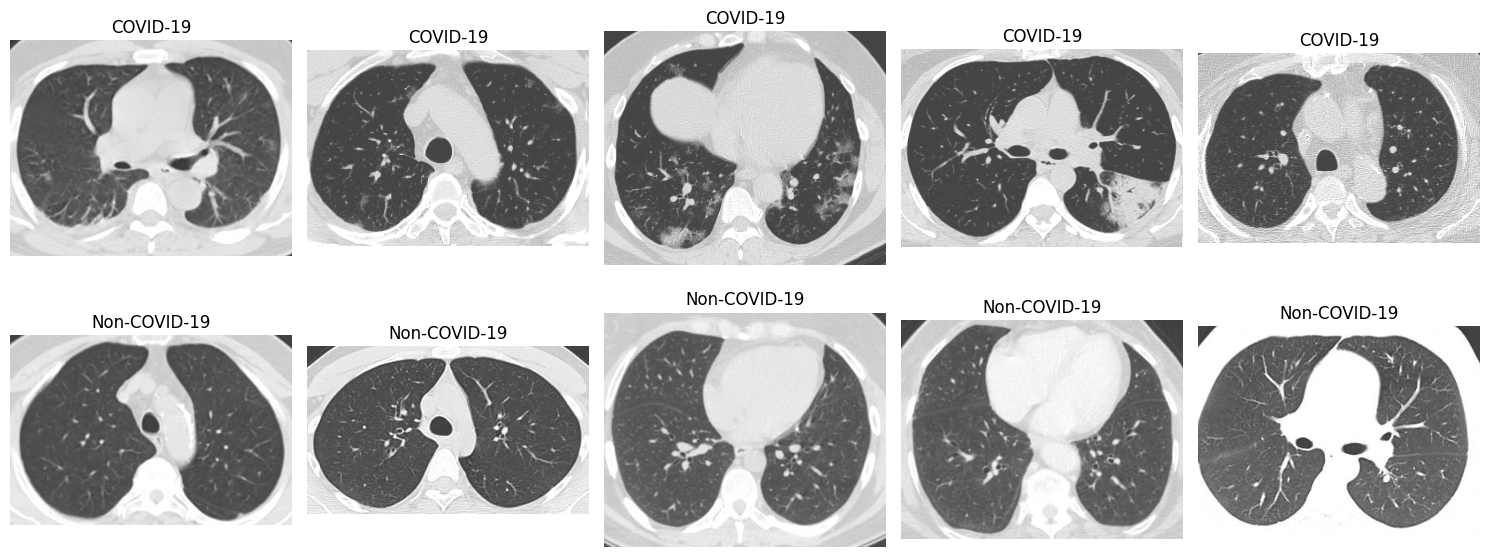


Validation Set Samples:


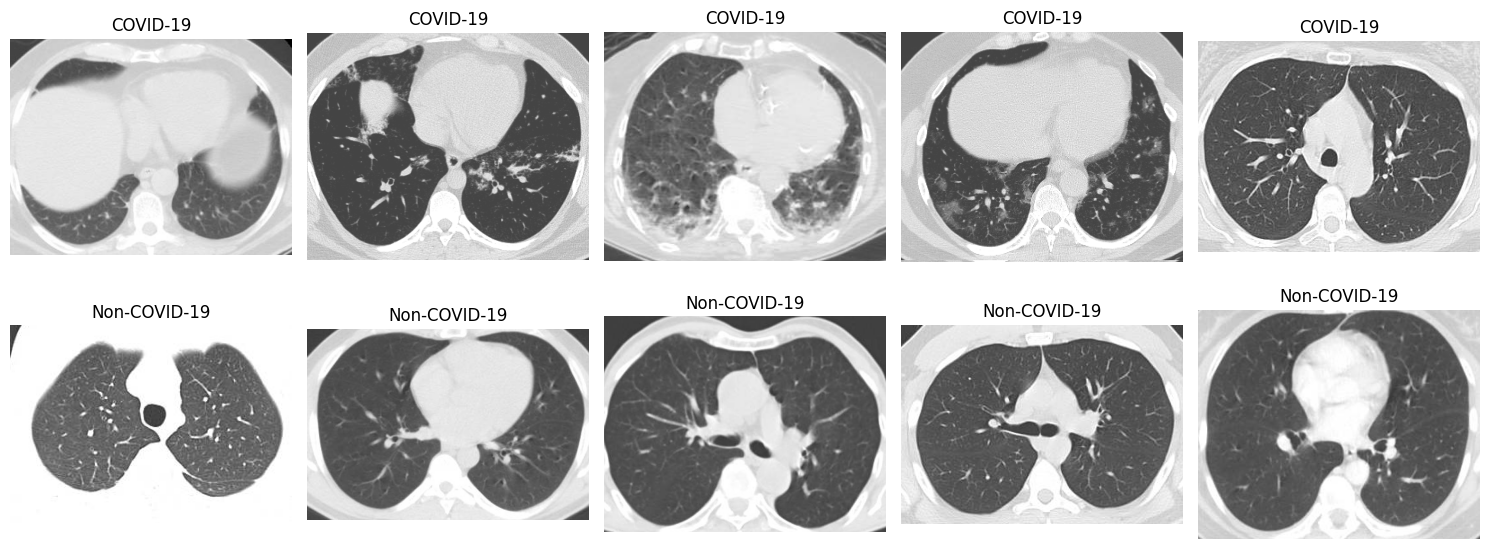


Test Set Samples:


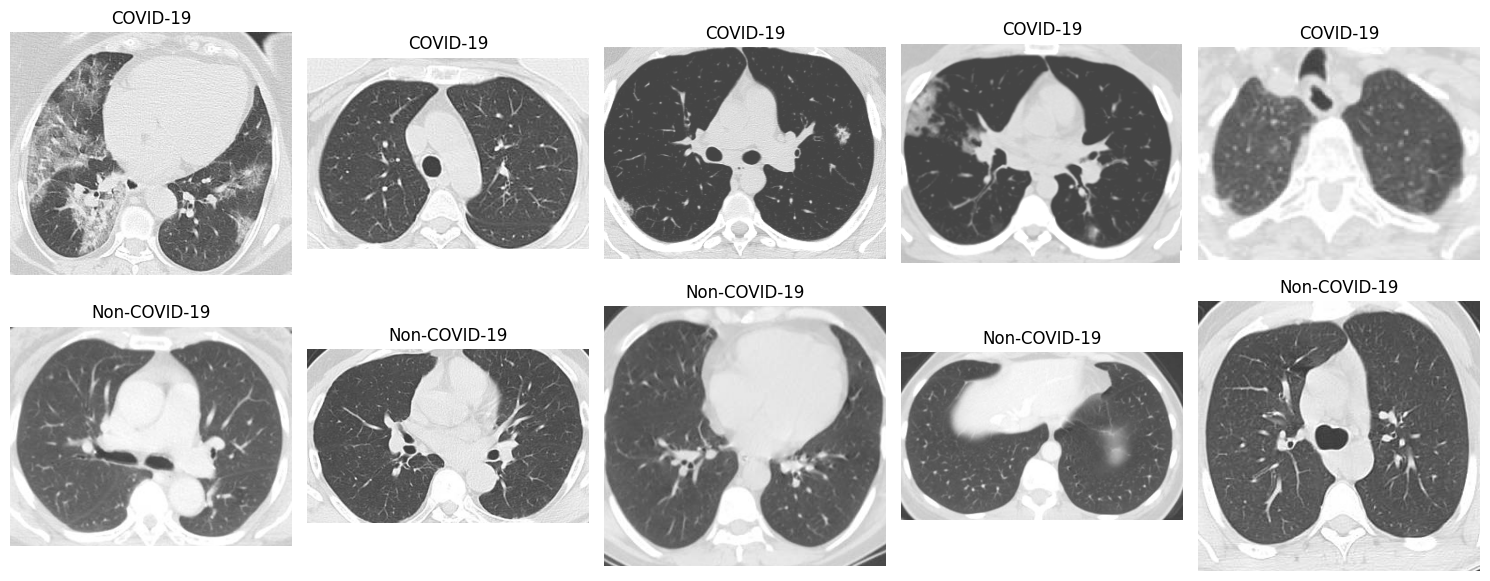


Distribution of images:

Training set:
Total images: 1736
COVID-19 images: 876 (50.5%)
Non-COVID-19 images: 860 (49.5%)

Validation set:
Total images: 371
COVID-19 images: 187 (50.4%)
Non-COVID-19 images: 184 (49.6%)

Test set:
Total images: 374
COVID-19 images: 189 (50.5%)
Non-COVID-19 images: 185 (49.5%)


In [ ]:
def show_samples(base_path, n_samples=5):
    """
    Display sample images from both COVID-19 and Non-COVID-19 classes
    """
    covid_path = os.path.join(base_path, 'COVID')
    non_covid_path = os.path.join(base_path, 'non-COVID')


    # Create subplot
    plt.figure(figsize=(15, 6))

    #COVID-19
    covid_files = os.listdir(covid_path)
    if covid_files:
        samples = random.sample(covid_files, min(n_samples, len(covid_files)))
        for i, file in enumerate(samples, 1):
            plt.subplot(2, n_samples, i)
            img = Image.open(os.path.join(covid_path, file))
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            plt.title('COVID-19')

    # Non-COVID-19
    non_covid_files = os.listdir(non_covid_path)
    if non_covid_files:
        samples = random.sample(non_covid_files, min(n_samples, len(non_covid_files)))
        for i, file in enumerate(samples, 1):
            plt.subplot(2, n_samples, i + n_samples)
            img = Image.open(os.path.join(non_covid_path, file))
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            plt.title('Non-COVID-19')

    plt.tight_layout()
    plt.show()

print("Training Set Samples:")
show_samples(train_dir)

print("\nValidation Set Samples:")
show_samples(val_dir)

print("\nTest Set Samples:")
show_samples(test_dir)

def print_distribution(directory):
    covid_count = len(os.listdir(os.path.join(directory, 'COVID')))
    non_covid_count = len(os.listdir(os.path.join(directory, 'non-COVID')))

    total = covid_count + non_covid_count

    print(f"Total images: {total}")
    print(f"COVID-19 images: {covid_count} ({(covid_count/total)*100:.1f}%)")
    print(f"Non-COVID-19 images: {non_covid_count} ({(non_covid_count/total)*100:.1f}%)")

print("\nDistribution of images:")
print("\nTraining set:")
print_distribution(train_dir)
print("\nValidation set:")
print_distribution(val_dir)
print("\nTest set:")
print_distribution(test_dir)

Detailed samples from each set:

Training Set:


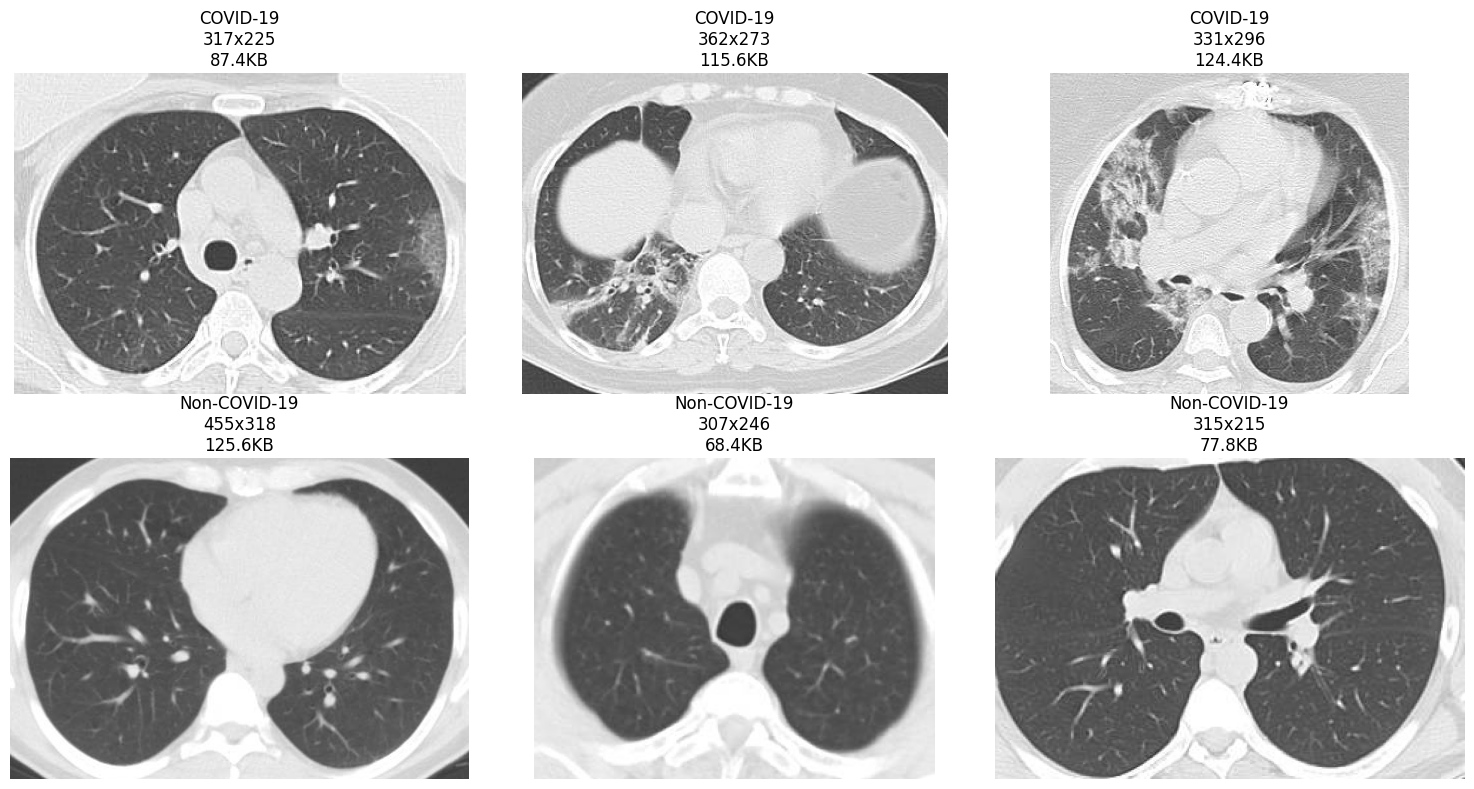


Validation Set:


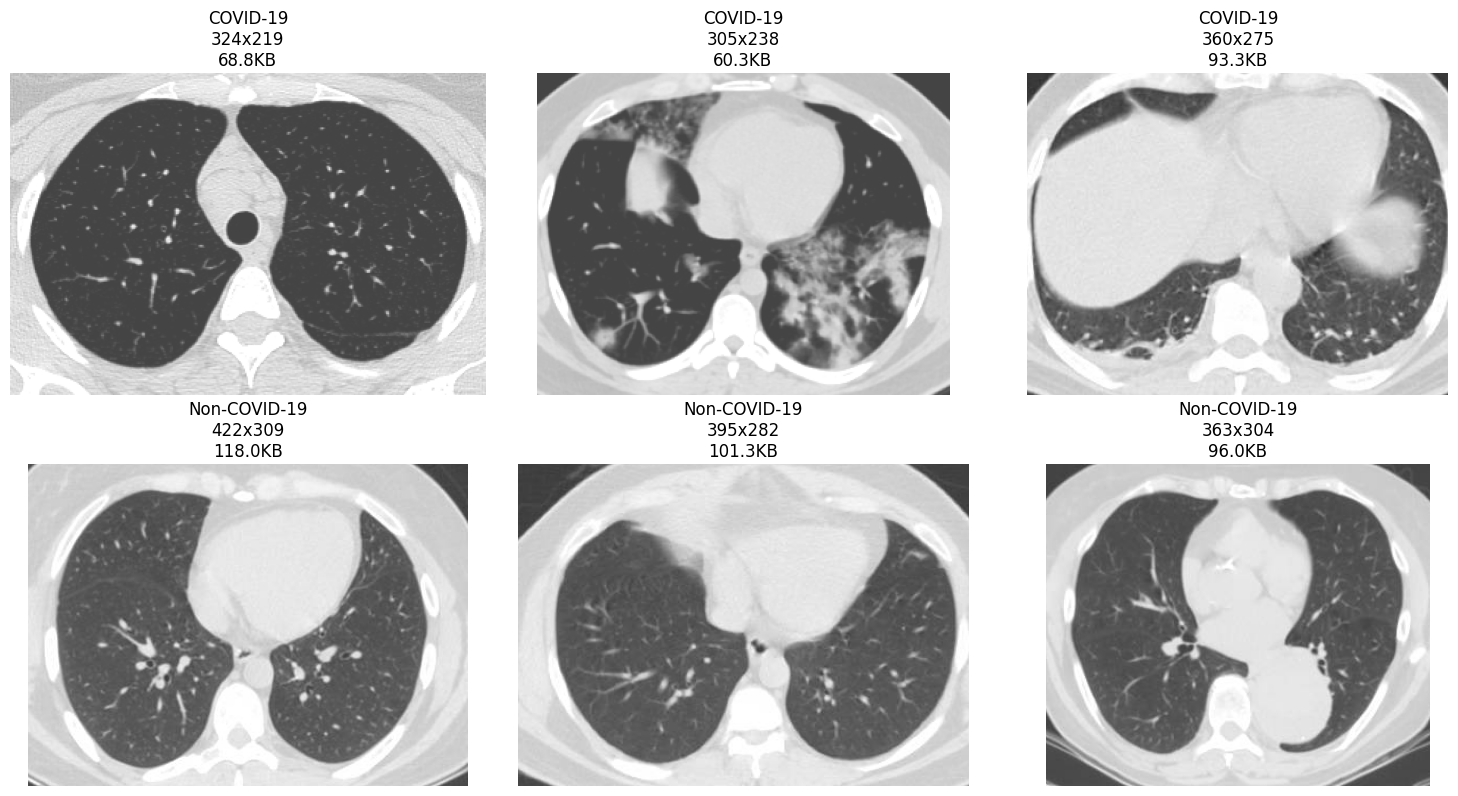


Test Set:


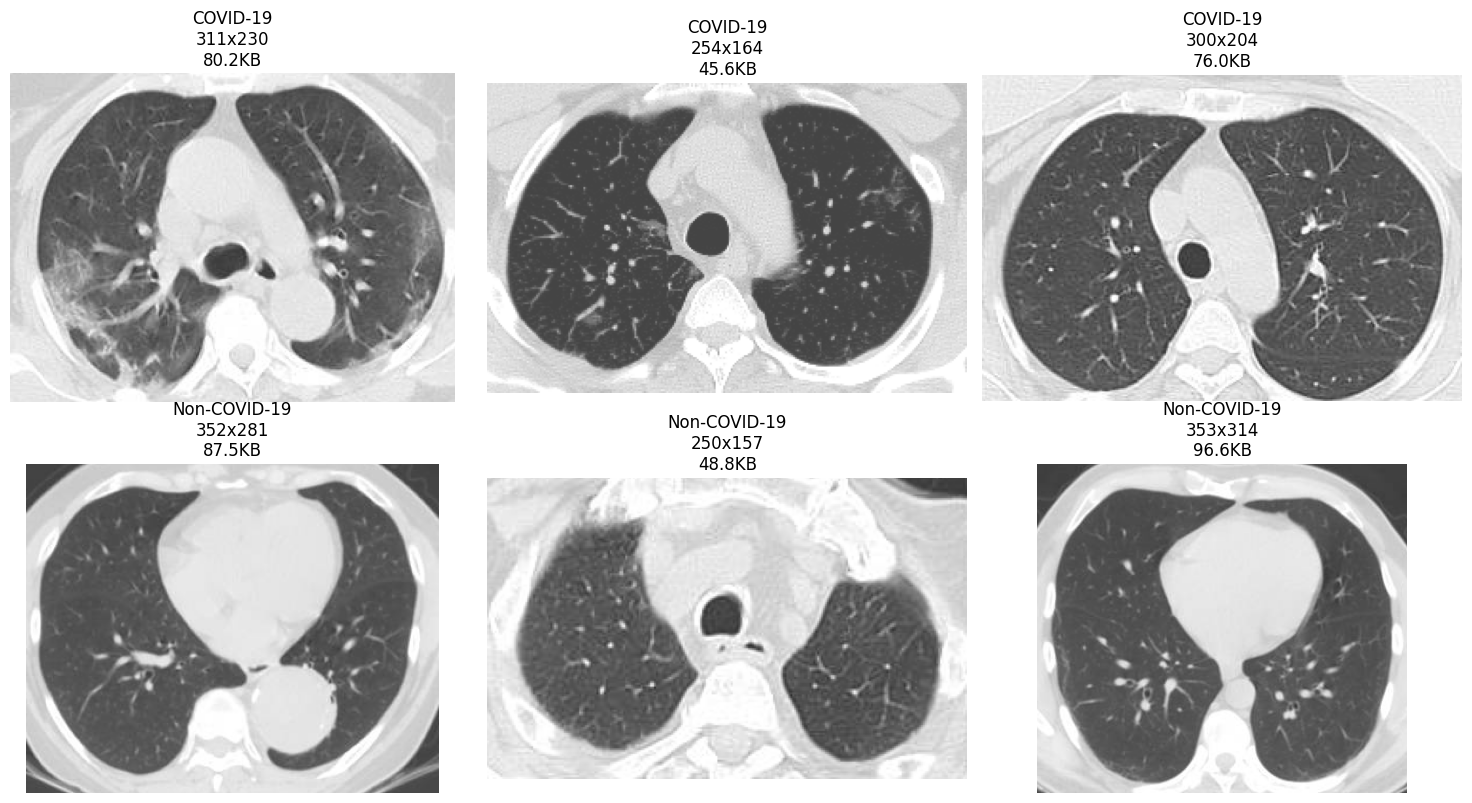

In [ ]:
def show_detailed_samples(base_path, n_samples=3):
    """
    Display sample images with detailed information
    """
    covid_path = os.path.join(base_path, 'COVID')
    non_covid_path = os.path.join(base_path, 'non-COVID')

    plt.figure(figsize=(15, 8))

    for idx, (class_path, class_name) in enumerate([
        (covid_path, 'COVID-19'),
        (non_covid_path, 'Non-COVID-19')
    ]):
        if os.path.exists(class_path):
            files = os.listdir(class_path)
            if files:
                samples = random.sample(files, min(n_samples, len(files)))
                for i, file in enumerate(samples):
                    plt.subplot(2, n_samples, i + 1 + idx * n_samples)
                    img_path = os.path.join(class_path, file)
                    img = Image.open(img_path)
                    plt.imshow(img, cmap='gray')
                    plt.axis('off')

                    # Get image details
                    file_size = os.path.getsize(img_path) / 1024  # ConvertS to KB
                    width, height = img.size

                    title = f'{class_name}\n{width}x{height}\n{file_size:.1f}KB'
                    plt.title(title)

    plt.tight_layout()
    plt.show()

print("Detailed samples from each set:")
print("\nTraining Set:")
show_detailed_samples(train_dir)
print("\nValidation Set:")
show_detailed_samples(val_dir)
print("\nTest Set:")
show_detailed_samples(test_dir)

Proposed Model Architecture
<br>
Xception Base → Multi-Head Channel Attention → Global Average Pooling → Dense(1024) → Dense(num_classes)

In [31]:
# class WeightedGlobalAveragePooling2D(tf.keras.layers.Layer):
#     """
#     Weighted Global Average Pooling Layer that learns channel-wise weights
#     """
#     def __init__(self, **kwargs):
#         super(WeightedGlobalAveragePooling2D, self).__init__(**kwargs)

#     def build(self, input_shape):
#         self.channel_weights = self.add_weight(
#             name='channel_weights',
#             shape=(input_shape[-1],),
#             initializer='ones',
#             trainable=True,
#             regularizer = tf.keras.regularizers.l2(0.001)
#         )
#         super(WeightedGlobalAveragePooling2D, self).build(input_shape)

#     def call(self, inputs):
#         # Apply global average pooling
#         pool_output = tf.reduce_mean(inputs, axis=[1, 2])
#         # Apply channel-wise weights
#         weighted_output = pool_output * tf.nn.softmax(self.channel_weights)
#         return weighted_output



In [ ]:
class MultiHeadChannelAttention(tf.keras.layers.Layer):
    """
    Multi-Head Channel Attention Module
    """
    def __init__(self, num_heads=8, ratio=3, **kwargs):  
        super(MultiHeadChannelAttention, self).__init__(**kwargs)
        self.num_heads = num_heads
        self.ratio = ratio

    def build(self, input_shape):
        self.channel = input_shape[-1]
        self.head_dim = self.channel // self.num_heads

        self.attention_heads = []
        for _ in range(self.num_heads):
            head_layers = {
                'dense_reduce': Dense(self.head_dim // self.ratio,
                                    activation='relu',
                                    kernel_initializer='HeNormal',
                                    use_bias=True),
                'dense_expand': Dense(self.head_dim,
                                    kernel_initializer='HeNormal',
                                    use_bias=True)
            }
            self.attention_heads.append(head_layers)

        super(MultiHeadChannelAttention, self).build(input_shape)

    def call(self, inputs):
        split_tensors = tf.split(inputs, self.num_heads, axis=-1)
        attention_outputs = []

        for i, head_input in enumerate(split_tensors):
            avg_pool = GlobalAveragePooling2D()(head_input)
            avg_pool = Reshape((1, 1, self.head_dim))(avg_pool)
            avg_pool = self.attention_heads[i]['dense_reduce'](avg_pool)
            avg_pool = self.attention_heads[i]['dense_expand'](avg_pool)

            max_pool = tf.reduce_max(head_input, axis=[1, 2], keepdims=True)
            max_pool = self.attention_heads[i]['dense_reduce'](max_pool)
            max_pool = self.attention_heads[i]['dense_expand'](max_pool)

            attention = Activation('sigmoid')(avg_pool + max_pool)
            attended_features = Multiply()([head_input, attention])
            attention_outputs.append(attended_features)

        return Concatenate(axis=-1)(attention_outputs)

In [ ]:
def build_model(input_shape=(224, 224, 1)):
    """
    Build the model with binary classification output
    """
    # Create input layer for grayscale images
    inputs = Input(shape=input_shape)

    # Convert grayscale to 3 channels
    x = Conv2D(3, (1, 1))(inputs)

    # x = tf.keras.layers.RandomRotation(0.15)(x)
    # x = tf.keras.layers.RandomZoom(0.15)(x)
    # x = tf.keras.layers.RandomFlip('horizontal_and_vertical')(x)
    # x = tf.keras.layers.RandomBrightness(0.15)(x)
    # x = tf.keras.layers.RandomContrast(0.1)(x)


    # Load Xception
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    # Freeze 70% of the layers
    num_layers = len(base_model.layers)
    num_frozen_layers = int(0.70 * num_layers)
    for layer in base_model.layers[:num_frozen_layers]:
        layer.trainable = False

    # Pass through Xception
    x = base_model(x)
    x = MultiHeadChannelAttention(num_heads=8)(x) # Add multi-head channel attention
    x = GlobalAveragePooling2D()(x)    # Global Average Pooling
    x = Dropout(0.4)(x)

    x = Dense(1024, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)   
    # x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    x = Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.0001))(x)  
    x = Dropout(0.3)(x)

    x = BatchNormalization()(x)

    # Output layer - single neuron with sigmoid for binary classification
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=predictions)

    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,  # Start with 0.0001
    decay_steps=20000,            # Decay every 10,000 steps
    decay_rate=0.95,               # Reduce by 10% each time
    staircase=True                # Apply decay in discrete steps
    )

    optimizer = Adam(learning_rate=lr_schedule)
    # optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    loss_fn = tf.keras.losses.BinaryCrossentropy(label_smoothing=0.1)
    model.compile(
        optimizer=optimizer,
        loss=loss_fn,
        metrics=['accuracy',
                tf.keras.metrics.AUC(),
                tf.keras.metrics.Precision(),
                tf.keras.metrics.Recall()]
    )

    return model

In [36]:
def train_model(model, train_generator, validation_generator, epochs=50):
    """
    Train the model with callbacks
    """
    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=epochs,
        batch_size=32,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True
            ),
            tf.keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.2,
                patience=6,
                min_lr=1e-6
            ),
            tf.keras.callbacks.ModelCheckpoint(
                'best_4.keras',
                monitor='val_accuracy',
                save_best_only=True,
                mode='max'
            )
        ]
    )
    return history



In [38]:
def evaluate_model(model, test_generator, validation_generator):
    """
    Comprehensive evaluation of the model on test data

    Args:
        model: Trained model to evaluate
        test_generator: Test data generator
        validation_generator: Optional validation generator for comparison

    Returns:
        results: Dictionary containing evaluation metrics
    """
    # Reset the test generator to the beginning
    # test_generator.reset()

    # Get the model predictions
    y_pred_prob = model.predict(test_generator)
    y_true = test_generator.classes

    # For binary classification
    if model.output_shape[1] == 1:  # Binary classification
        y_pred = (y_pred_prob > 0.5).astype(int).flatten()
        y_pred_prob = y_pred_prob.flatten()
    else:  # Multi-class
        y_pred = np.argmax(y_pred_prob, axis=1)

    # Calculate various metrics
    test_loss, test_accuracy, test_auc, test_precision, test_recall = model.evaluate(test_generator)

    # Store results in a dictionary
    results = {
        'test_accuracy': test_accuracy,
        'test_loss': test_loss,
        'test_auc': test_auc,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'y_true': y_true,
        'y_pred': y_pred,
        'y_pred_prob': y_pred_prob
    }

    # If validation data is provided, evaluate on that too
    if validation_generator is not None:
        validation_generator.reset()
        val_loss, val_accuracy, val_auc, val_precision, val_recall = model.evaluate(validation_generator)

        results.update({
            'val_accuracy': val_accuracy,
            'val_loss': val_loss,
            'val_auc': val_auc,
            'val_precision': val_precision,
            'val_recall': val_recall
        })

    # Calculate F1 score (harmonic mean of precision and recall)
    f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall + 1e-10)
    results['f1_score'] = f1_score

    # Print a summary of the results
    print("\n===== Model Evaluation Results =====")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test AUC: {test_auc:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test F1 Score: {f1_score:.4f}")
    print("====================================\n")

    # Generate classification report
    target_names = test_generator.class_indices
    target_names = {v: k for k, v in target_names.items()}  # Reverse the dictionary
    target_names = [target_names[i] for i in sorted(target_names.keys())]

    classification_rep = classification_report(
        y_true,
        y_pred,
        target_names=target_names,
        digits=5
    )
    print("Classification Report:")
    print(classification_rep)

    results['classification_report'] = classification_rep

    return results

In [39]:
def plot_confusion_matrix(results, class_names):
    """
    Plot confusion matrix for model evaluation

    Args:
        results: Results dictionary from evaluate_model function
        class_names: List of class names
    """
    y_true = results['y_true']
    y_pred = results['y_pred']

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print metrics derived from confusion matrix
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)  # Same as recall
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    print(f"Sensitivity (Recall): {sensitivity:.5f}")
    print(f"Specificity: {specificity:.5f}")
    print(f"Accuracy: {accuracy:.5f}")

    return cm



In [40]:
def plot_roc_curve(results, class_names=None):
    """
    Plot ROC curve for model evaluation

    Args:
        results: Results dictionary from evaluate_model function
        class_names: List of class names (for multi-class models)
    """
    y_true = results['y_true']
    y_pred_prob = results['y_pred_prob']

    plt.figure(figsize=(10, 8))

    # For binary classification
    if len(y_pred_prob.shape) == 1 or y_pred_prob.shape[1] == 1:
        fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")
    else:
        # For multi-class problems
        from sklearn.preprocessing import label_binarize
        n_classes = y_pred_prob.shape[1]
        y_test_bin = label_binarize(y_true, classes=range(n_classes))

        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            class_label = class_names[i] if class_names else f"Class {i}"
            plt.plot(fpr[i], tpr[i], lw=2,
                     label=f'ROC curve {class_label} (AUC = {roc_auc[i]:.4f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) for Multi-class')
        plt.legend(loc="lower right")

    plt.tight_layout()
    plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
    plt.show()



In [41]:
def plot_precision_recall_curve(results, class_names=None):
    """
    Plot Precision-Recall curve for model evaluation

    Args:
        results: Results dictionary from evaluate_model function
        class_names: List of class names (for multi-class models)
    """
    y_true = results['y_true']
    y_pred_prob = results['y_pred_prob']

    plt.figure(figsize=(10, 8))

    # For binary classification
    if len(y_pred_prob.shape) == 1 or y_pred_prob.shape[1] == 1:
        precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
        avg_precision = average_precision_score(y_true, y_pred_prob)

        plt.plot(recall, precision, lw=2,
                 label=f'Precision-Recall curve (AP = {avg_precision:.4f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('Precision-Recall Curve')
        plt.legend(loc="lower left")
    else:
        # For multi-class problems
        from sklearn.preprocessing import label_binarize
        n_classes = y_pred_prob.shape[1]
        y_test_bin = label_binarize(y_true, classes=range(n_classes))

        precision = dict()
        recall = dict()
        avg_precision = dict()

        for i in range(n_classes):
            precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
            avg_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])
            class_label = class_names[i] if class_names else f"Class {i}"
            plt.plot(recall[i], precision[i], lw=2,
                     label=f'PR curve {class_label} (AP = {avg_precision[i]:.4f})')

        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('Precision-Recall Curve for Multi-class')
        plt.legend(loc="lower left")

    plt.tight_layout()
    plt.savefig('precision_recall_curve.png', dpi=300, bbox_inches='tight')
    plt.show()



In [42]:
def plot_training_history(history):
    """
    Plot training history metrics

    Args:
        history: Training history from model.fit
    """
    # Create a figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Plot training & validation accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Train')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation')
    axes[0, 0].set_title('Model Accuracy')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].legend(loc='lower right')
    axes[0, 0].grid(True)

    # Plot training & validation loss
    axes[0, 1].plot(history.history['loss'], label='Train')
    axes[0, 1].plot(history.history['val_loss'], label='Validation')
    axes[0, 1].set_title('Model Loss')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].legend(loc='upper right')
    axes[0, 1].grid(True)

    # Plot training & validation precision
    axes[1, 0].plot(history.history['precision'], label='Train')
    axes[1, 0].plot(history.history['val_precision'], label='Validation')
    axes[1, 0].set_title('Model Precision')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].legend(loc='lower right')
    axes[1, 0].grid(True)

    # Plot training & validation recall
    axes[1, 1].plot(history.history['recall'], label='Train')
    axes[1, 1].plot(history.history['val_recall'], label='Validation')
    axes[1, 1].set_title('Model Recall')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].legend(loc='lower right')
    axes[1, 1].grid(True)

    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
    plt.show()



In [43]:
def plot_metrics_comparison(models_results, model_names):
    """
    Compare metrics across multiple models

    Args:
        models_results: List of results dictionaries from evaluate_model function
        model_names: List of model names corresponding to the results
    """
    metrics = ['test_accuracy', 'test_precision', 'test_recall', 'f1_score', 'test_auc']
    metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

    # Create a DataFrame for easy plotting
    data = []
    for i, results in enumerate(models_results):
        row = [model_names[i]]
        for metric in metrics:
            row.append(results.get(metric, 0))
        data.append(row)

    df = pd.DataFrame(data, columns=['Model'] + metric_labels)
    df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Value')

    plt.figure(figsize=(14, 8))
    sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted)
    plt.title('Model Performance Comparison')
    plt.ylim(0, 1.05)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    return df


In [44]:
def create_summary_table(results, model_name="COVID Classification Model"):
    """
    Create a summary table of model performance metrics

    Args:
        results: Results dictionary from evaluate_model function
        model_name: Name of the model for the table

    Returns:
        df: DataFrame containing the performance metrics
    """
    metrics = {
        'Model': model_name,
        'Accuracy': results['test_accuracy'],
        'Precision': results['test_precision'],
        'Recall': results['test_recall'],
        'F1 Score': results['f1_score'],
        'AUC': results['test_auc'],
    }

    # Add specificity if confusion matrix is available
    if 'confusion_matrix' in results:
        cm = results['confusion_matrix']
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp)
        metrics['Specificity'] = specificity

    # Create DataFrame
    df = pd.DataFrame([metrics])

    # Print the table
    print("\n===== Model Performance Summary =====")
    print(tabulate(df, headers='keys', tablefmt='pretty', floatfmt='.5f'))
    print("=====================================\n")

    # Save to CSV
    df.to_csv(f'model_performance_{model_name.replace(" ", "_")}.csv', index=False)

    return df


In [45]:
def plot_model_architecture(model, show_shapes=True, show_layer_names=True,
                           to_file='model_architecture.png'):
    """
    Visualize the model architecture

    Args:
        model: The Keras model to visualize
        show_shapes: Whether to display shape information
        show_layer_names: Whether to display layer names
        to_file: Filename to save the visualization
    """
    try:
        tf.keras.utils.plot_model(
            model,
            to_file=to_file,
            show_shapes=show_shapes,
            show_layer_names=show_layer_names,
            dpi=96
        )
        print(f"Model architecture saved to {to_file}")
    except Exception as e:
        print(f"Error generating model architecture visualization: {e}")
        print("You may need to install graphviz and pydot packages.")



In [46]:
def evaluate_and_visualize_model(model, test_generator, validation_generator=None,
                               history=None, class_names=None, model_name="COVID Model"):
    """
    Complete function to evaluate and visualize model performance

    Args:
        model: Trained model to evaluate
        test_generator: Test data generator
        validation_generator: Optional validation generator
        history: Training history from model.fit
        class_names: List of class names
        model_name: Name of the model for the reports

    Returns:
        results: Dictionary containing all evaluation metrics
    """
    print(f"\n===== Evaluating {model_name} =====")

    # Evaluate the model
    results = evaluate_model(model, test_generator, validation_generator)

    # Calculate and store confusion matrix
    if class_names is None:
        class_names = list(test_generator.class_indices.keys())

    cm = plot_confusion_matrix(results, class_names)
    results['confusion_matrix'] = cm

    # Plot ROC curve
    plot_roc_curve(results, class_names)

    # Plot Precision-Recall curve
    plot_precision_recall_curve(results, class_names)

    # If history is provided, plot training curves
    if history is not None:
        plot_training_history(history)

    # Create summary table
    summary_df = create_summary_table(results, model_name)
    results['summary_table'] = summary_df

    # Visualize model architecture
    plot_model_architecture(model, to_file=f'{model_name.replace(" ", "_")}_architecture.png')

    return results



In [47]:
# Create and train the improved model
model = build_model(input_shape=(IMG_SIZE, IMG_SIZE, 1))
history = train_model(model, train_generator, validation_generator,epochs=80)

results = evaluate_model(model, test_generator, validation_generator)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 94s 946ms/step - accuracy: 0.5585 - auc: 0.5849 - loss: 2.2302 - precision: 0.5266 - recall: 0.6064 - val_accuracy: 0.5714 - val_auc: 0.7679 - val_loss: 2.0938 - val_precision: 0.5364 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 2/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 414ms/step - accuracy: 0.6991 - auc: 0.7495 - loss: 2.0760 - precision: 0.6956 - recall: 0.7177 - val_accuracy: 0.6334 - val_auc: 0.8111 - val_loss: 2.0460 - val_precision: 0.5750 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 3/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 407ms/step - accuracy: 0.7160 - auc: 0.7889 - loss: 2.0266 - precision: 0.6652 - recall: 0.7807 - val_accuracy: 0.7574 - val_auc: 0.8660 - val_loss: 1.9458 - val_precision: 0.6780 - val_recall: 0.9728 - learning_rate: 1.0000e-04
Epoch 4/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 42s 424ms/step - accuracy: 0.7394 - auc: 0.8239 - loss: 1.9732 - precision: 0.6911 - recall: 0.8334 - val_accuracy: 0.8221 - val_auc: 0.8987 - val_lo


===== Evaluating COVID-Attention-Model =====
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.9813 - auc: 0.6127 - loss: 0.3922 - precision: 0.5307 - recall: 0.6054
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.9820 - auc: 0.6142 - loss: 0.3780 - precision: 0.5544 - recall: 0.5875

===== Model Evaluation Results =====
Test Accuracy: 0.9733
Test AUC: 0.9945
Test Precision: 0.9679
Test Recall: 0.9784
Test F1 Score: 0.9731

Classification Report:
              precision    recall  f1-score   support

       COVID    0.97861   0.96825   0.97340       189
   non-COVID    0.96791   0.97838   0.97312       185

    accuracy                        0.97326       374
   macro avg    0.97326   0.97332   0.97326       374
weighted avg    0.97332   0.97326   0.97326       374



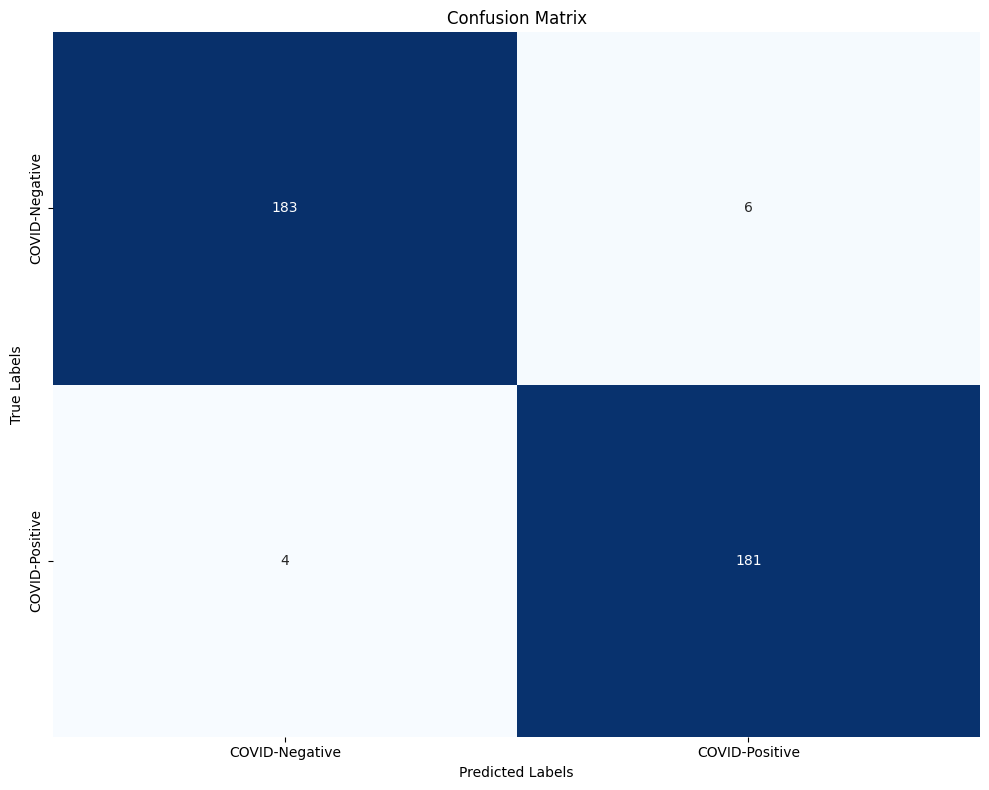

Sensitivity (Recall): 0.97838
Specificity: 0.96825
Accuracy: 0.97326


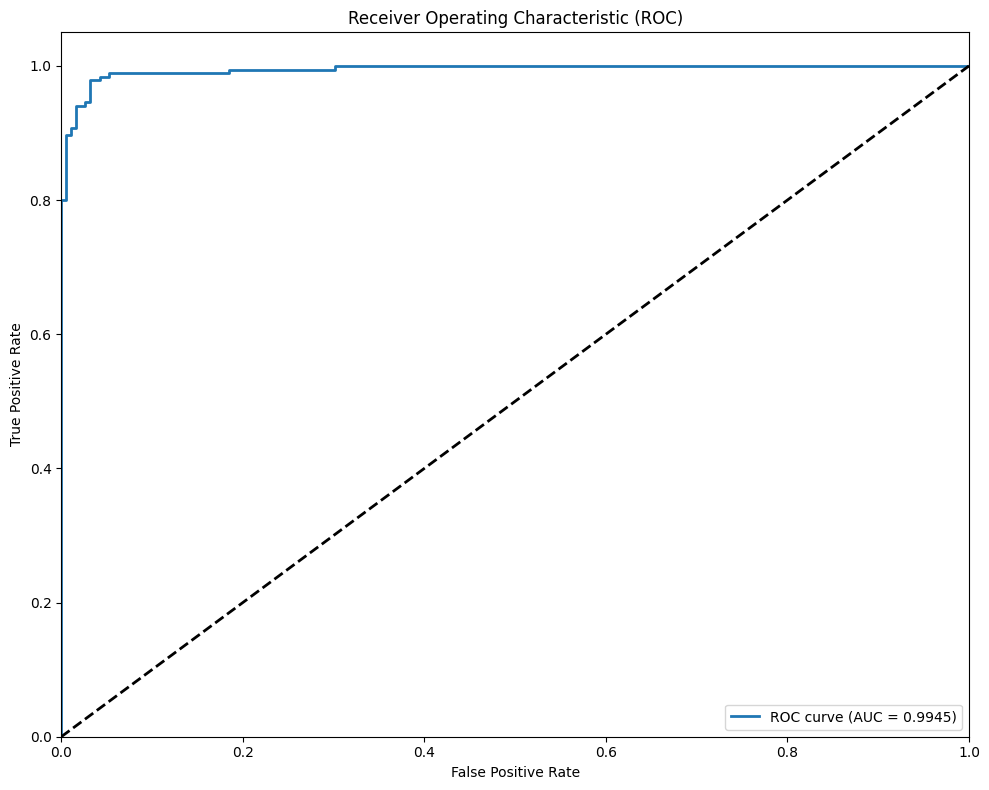

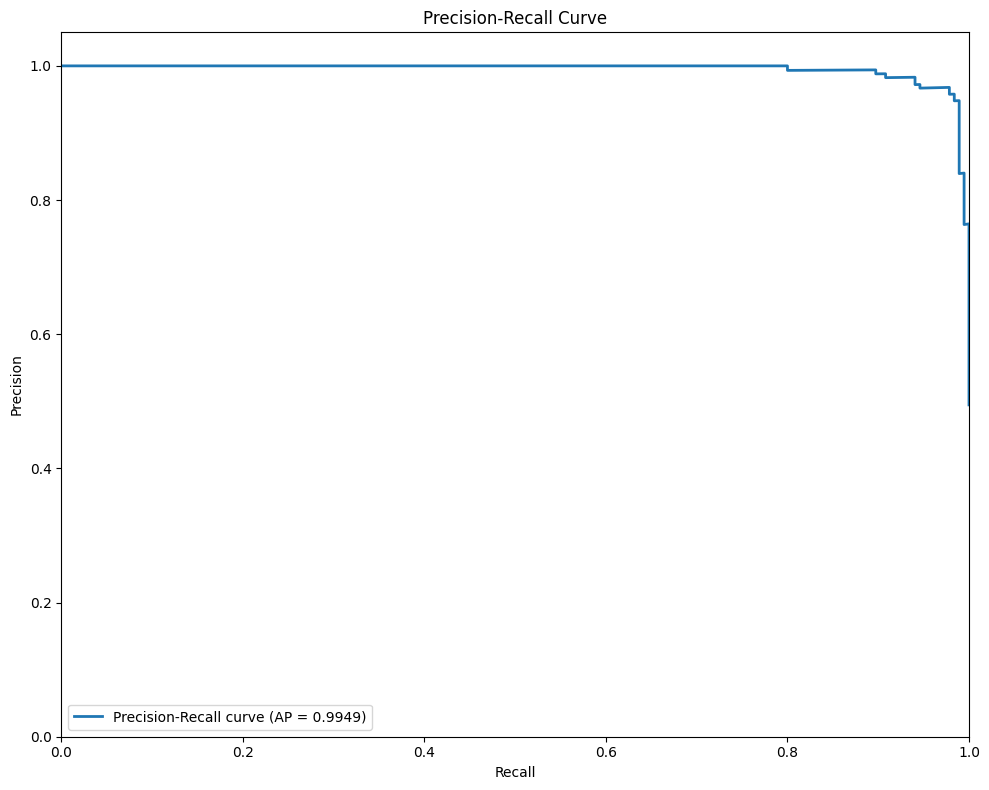

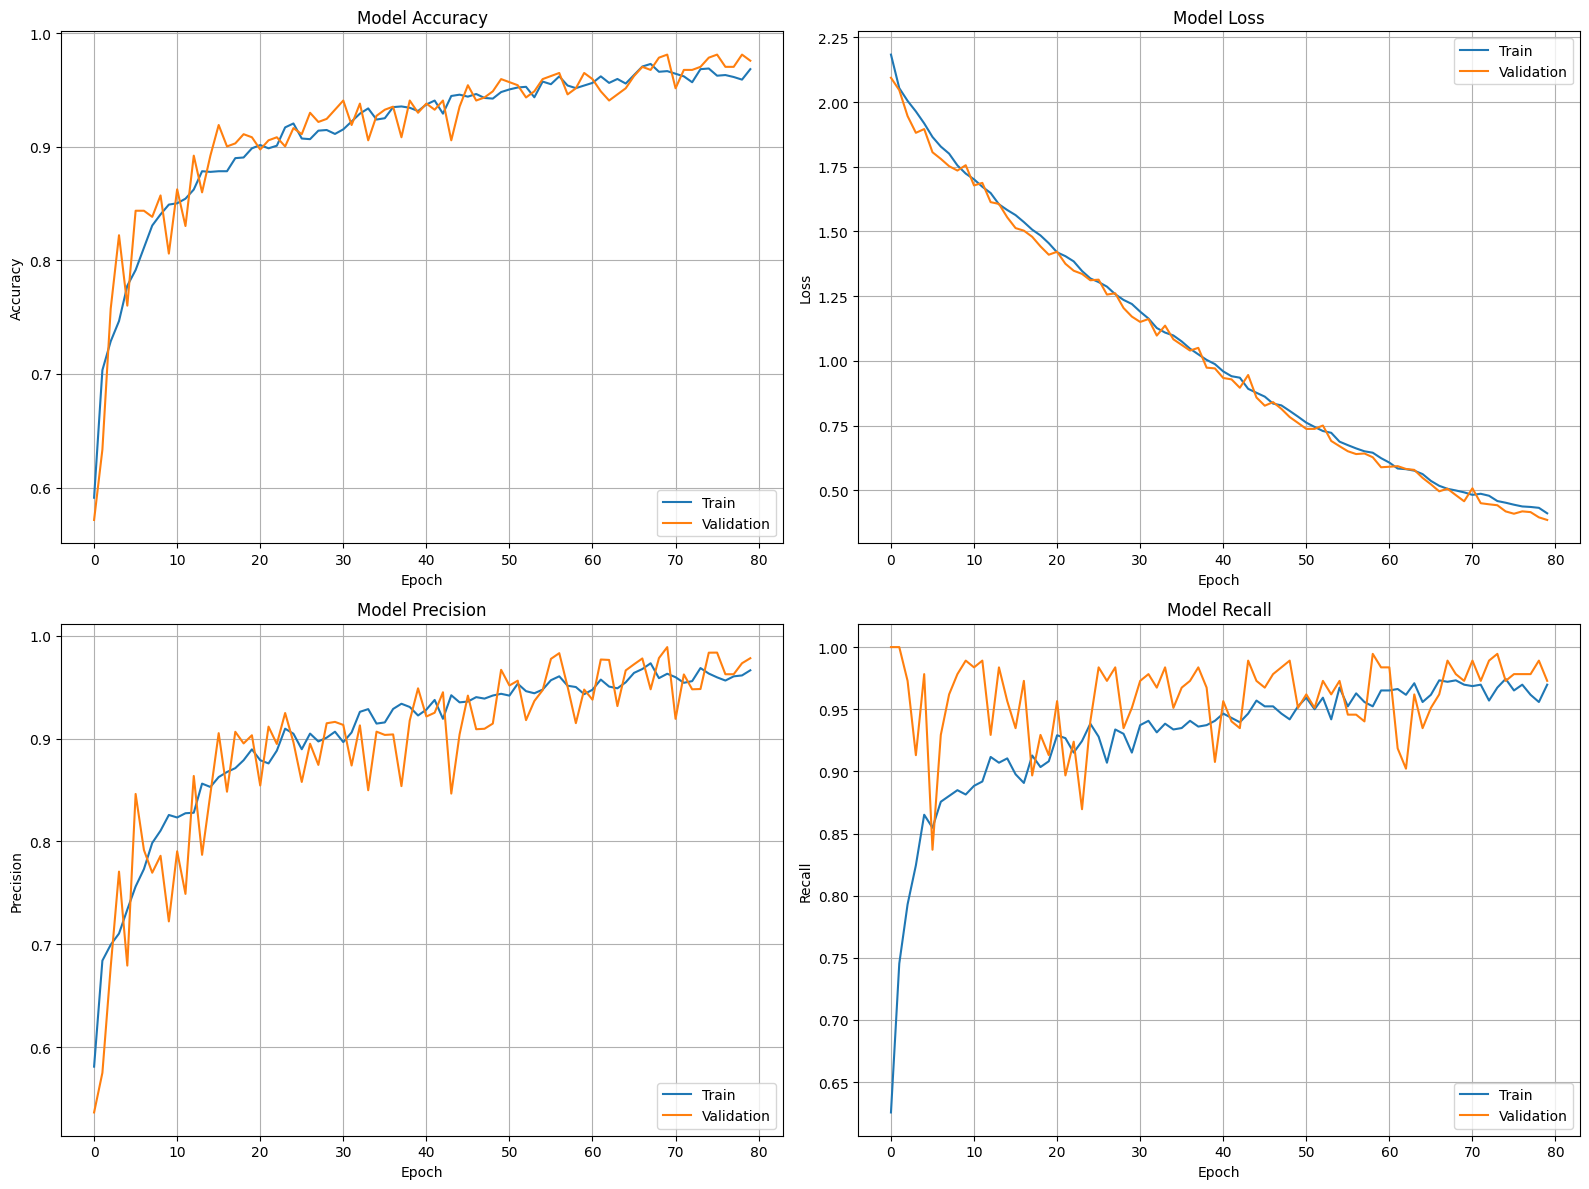


===== Model Performance Summary =====
+---+-----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   |         Model         |      Accuracy      |     Precision      |       Recall       |      F1 Score      |        AUC         |    Specificity     |
+---+-----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| 0 | COVID-Attention-Model | 0.9732620120048523 | 0.9679144620895386 | 0.9783783555030823 | 0.9731182801254845 | 0.9944801926612854 | 0.9682539682539683 |
+---+-----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+

Model architecture saved to COVID-Attention-Model_architecture.png


In [48]:
#Evaluate and visualize the model performance
class_names = ['COVID-Negative','COVID-Positive']
results = evaluate_and_visualize_model(
    model,
    test_generator,
    validation_generator,
    history,
    class_names=class_names,
    model_name="COVID-Attention-Model"
)



In [65]:
from keras.models import load_model

custom_objects = {'MultiHeadChannelAttention': MultiHeadChannelAttention}
loaded_model = load_model('best_4.keras', custom_objects=custom_objects)


In [67]:
loaded_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 3)    │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multi_head_channel_attention    │ (None, 7, 7, 2048)     │       350,888 │
│ (MultiHeadChannelAttention)     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,897,382 (194.16 MB)

 Trainable params: 13,529,735 (51.61 MB)

 Non-trainable params: 10,308,176 (39.32 MB)

 Optimizer params: 27,059,471 (103.22 MB)